In [5]:
#畫輪廓
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt


img_path = "data/opencv.png"
img=cv2.imread(img_path)
imgray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('original',imgray)
cv2.waitKey(0)

-1

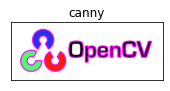

In [6]:
#blurred = cv2.GaussianBlur(imgray, (11, 11), 0)
canny = cv2.Canny(imgray, 20, 160)
contours, hierarchy =cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result=cv2.drawContours(img.copy(),contours,-1,(255,0,255),5)  # img为三通道才能显示轮廓

plt.subplot(122),plt.imshow(result),plt.title('canny')
plt.xticks([]), plt.yticks([])
plt.show()

# cv2.imshow('canny',canny)
# cv2.imshow('drawimg',result)
# cv2.waitKey(0)


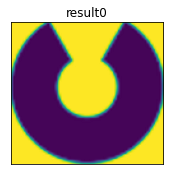

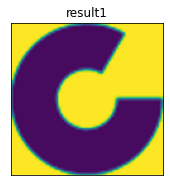

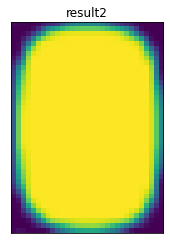

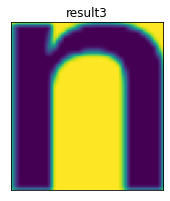

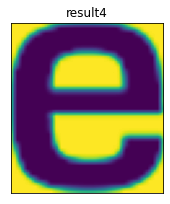

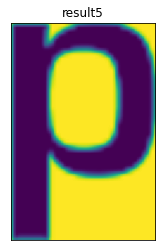

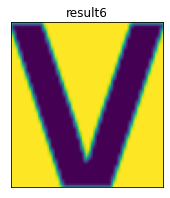

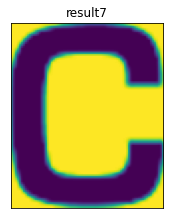

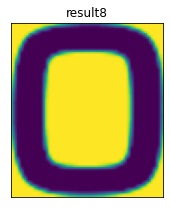

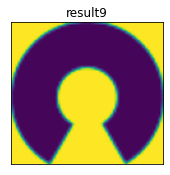

In [7]:
#擷取圖片
for (i, c) in enumerate(contours):

    (x, y, w, h) = cv2.boundingRect(c) #最小矩形邊框
    target = imgray[y:y + h, x:x + w]

    mask = np.zeros(imgray.shape[:2], dtype = "uint8")
    # ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    # mask = cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    #（x,y）为矩形左上角的坐标，（w,h）是矩形的宽和高
    mask=cv2.rectangle(c,(x,y),(x+w,y+h),(0,255,0),2)
    mask = mask[y:y + h, x:x + w]
    result= cv2.bitwise_and(target, target, mask = mask)

    # cv2.imshow('drawimg{0}'.format(i),result)
    # cv2.waitKey(0)

    plt.subplot(122),plt.imshow(result),plt.title('result{0}'.format(i))
    plt.xticks([]), plt.yticks([])
    plt.show()
    